In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
olddata = 'data/GALFA_HI_RA+DEC_140.00+18.35_W.fits'
img = fits.getdata(olddata)[1024] ## central velocity channel

In [3]:
def GaussSM_image(image, H_beam=16.2, G_beam=4):
    ## the image is at the velocity channel of the dwarf 
    ## H_beam: HI4PI beam size in arcmin 
    ## G_beam: GALFA-HI beam size in arcmin 
    
    import numpy as np
    from scipy.ndimage import gaussian_filter
    
    pix_size = 1 # GALFA-HI pixel size, in arcmin 
    convl_beam = np.sqrt(H_beam**2 - G_beam**2) # FWHM
    sigma = convl_beam/2.355/pix_size ## kernel size in pixel, FWHM=2.355sigma
    return gaussian_filter(image, sigma=sigma)


# sm_img = GaussSM_image(img)

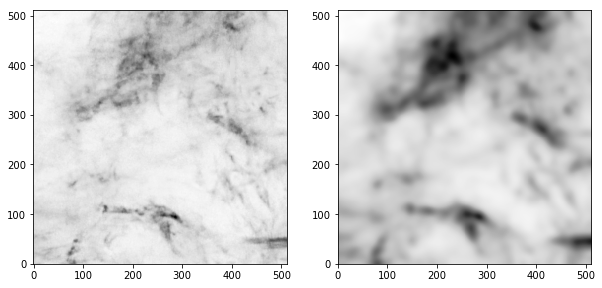

In [5]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.imshow(img, cmap=plt.cm.Greys, interpolation=None, origin='lower')

ax2 = fig.add_subplot(122)
ax2.imshow(sm_img, cmap=plt.cm.Greys, interpolation=None, origin='lower')


plt.savefig('/Users/Yong/Desktop/Smooth_GALFA_HI_RA+DEC_140.00+18.35_W.pdf')
#for ax in [ax1, ax2]:
#    ax.set_xlim(100, 300)
#    ax.set_ylim(300, 500)